In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report

# Load and explore the dataset
data = pd.read_csv('E:heart_failure_clinical_records_dataset.csv')
print(data.head())


    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [4]:
# Preprocess the data
data = data.dropna()
data = pd.get_dummies(data)
X = data.drop('serum_creatinine', axis=1)
y = data['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
print(f"Linear Regression Mean Squared Error: {linear_mse}")

Linear Regression Mean Squared Error: 1.0495898536999701e-26


In [6]:
# Neural Networks
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_pred)
print(f"Neural Networks Mean Squared Error: {nn_mse}")

Neural Networks Mean Squared Error: 2912.7920379615884


In [7]:
# Support Vector Machines
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_pred)
print(f"Support Vector Machines Mean Squared Error: {svm_mse}")

Support Vector Machines Mean Squared Error: 0.343475846093809


In [8]:
# Decision Trees
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_pred)
print(f"Decision Trees Mean Squared Error: {tree_mse}")


Decision Trees Mean Squared Error: 0.0


In [9]:
# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
print(f"Random Forest Regressor Mean Squared Error: {rf_mse}")

Random Forest Regressor Mean Squared Error: 0.0


In [10]:
# Confusion Matrix (for Decision Tree)
tree_pred_classes = tree_model.predict(X_test).round().astype(int)
cm = confusion_matrix(y_test.round().astype(int), tree_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[35  0]
 [ 0 25]]


In [11]:
# Classification Report (for Decision Tree)
class_report = classification_report(y_test.round().astype(int), tree_pred_classes)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        25

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



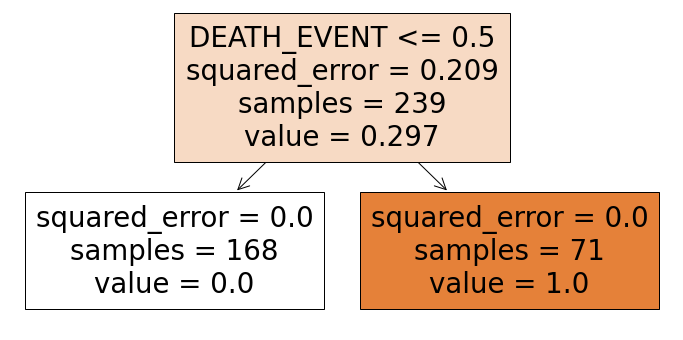

In [12]:
# Decision Tree Visualization
plt.figure(figsize=(12, 6))
plot_tree(tree_model, feature_names=X.columns, filled=True)
plt.show()

In [ ]:
Loads the heart_failure_clinical_records_dataset.csv dataset using pandas and displays the first few rows.
Preprocesses the data by dropping any rows with missing values and creating dummy variables for categorical features.
Splits the data into training and testing sets using train_test_split.
Trains and evaluates various regression models using mean squared error (MSE) as the evaluation metric.
Linear Regression
Neural Networks (Multi-layer Perceptron)
Support Vector Machines (SVR)
Decision Trees
Random Forest Regressor
Computes the confusion matrix and classification report for the Decision Tree model, which is converted into binary classification by rounding the predictions.
Visualizes the Decision Tree model using the plot_tree function from scikit-learn and matplotlib.